# Mach-Zehnder Interferometer

In this section, we are going to implement Mach-Zehnder interferometer using quantum circuits in Qiskit and run expriments on real IBM Quantum devices.

<img src="MZI_instr.png" alt="MZI Instrument" width="800"/>

## Implementing Mach-Zehnder Interferometer in a Quantum Circuit
Recall from the lecture, Mach-Zehnder interferometer consists of beam splitters and phase shifters in traditional quantum optics setup. To implement the same experiment in quantum circuits, you will need to 

1. Replace beam splitters with quantum gates
2. Replace phase shifters with quantum gates.

We define phase change $\phi = \phi_{0}-\phi_{1}$. Check [this chapter]( https://qiskit.org/textbook/ch-states/single-qubit-gates.html) in the Qiskit textbook for a list of single-qubit gates in Qiskit.

In [1]:
from qiskit import QuantumCircuit, execute
import numpy as np
from numpy import pi

In [2]:
# phi is the phase change 
phi = pi/2

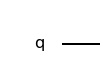

In [3]:
# Problem 1: Implement Mach-Zehnder interferometer in quantum circuit, `mz`

mz = QuantumCircuit(1)

# Insert your code here
#
#
#
#
#

# Visualize the quantum circuit
mz.draw()

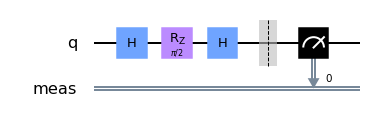

In [4]:
# Solution
mz = QuantumCircuit(1)
mz.h(0)
mz.rz(phi, 0)
mz.h(0)
mz.measure_all()
mz.draw()

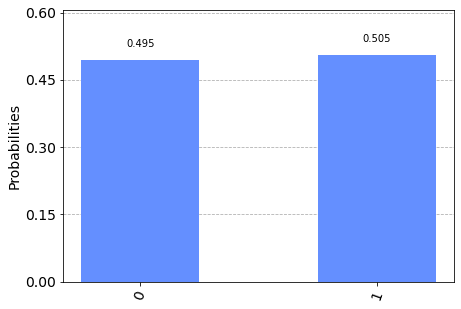

In [5]:
# Verify your circuit is correct
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

result = execute(mz, QasmSimulator(), shots=1024).result()
plot_histogram(result.get_counts())

# If your circuit is correct, you should see 
# approximately 50% 0 and 50% 1 for phi = pi/2
# 100% 0 for phi = 0
# 100% 1 for phi = pi

## Investigate Output Intensity Dependence on Phase Change

The output intensity has strong dependence on phase change. Probability of measuring $|0\rangle$ is $P_{|0\rangle}=\cos ^{2} \frac{\phi_{0}-\phi_{1}}{2}$ and Probability of measuring $|1\rangle$ is $P_{|1\rangle}=\sin ^{2} \frac{\phi_{0}-\phi_{1}}{2}$. Let's do experiments to verify these relations!

In the previous section, you have created a quantum circuit with a specific phase change ($\phi = \phi_{0}-\phi_{1}$). In this section, you will run a series of quantum circuits with different phase change and run them on real devices on IBM Quantum Experience. Plot results as a function of phase change similar to this figure:
<img src="MZI-result-example.pdf" alt="MZI Result Example" width="600"/>

### Parameterised Circuits
You can choose to do vary the phase change in a loop but you can also use a handy feature in Qiskit to create parameterised circuit.

In [6]:
from qiskit.circuit import Parameter
phi = Parameter('phi')

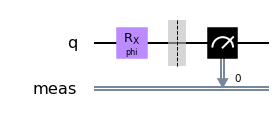

In [7]:
# Create a parameterised circuit

qc = QuantumCircuit(1)
qc.rx(phi, 0)
qc.measure_all()
qc.draw()

# You will see a Rx gate with generic phi as rotation angle

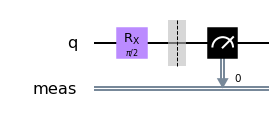

In [8]:
# Assign a value to the parameter

qc.assign_parameters({phi: pi/2}).draw()

# You will see a Rx gate with pi as the rotation angle instead of a generic phi

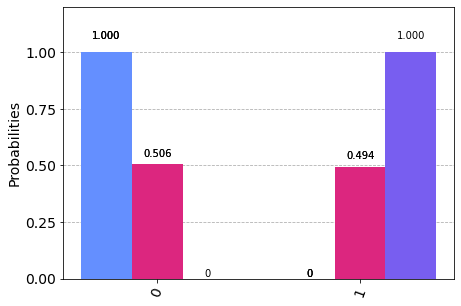

In [9]:
# You can also create a list of parameters to pass to `execute` method
# to execute multiple circuits with different parameter values

parameter_list = [{phi: 0}, {phi:pi/2},{phi:pi}]
job_example = execute(qc, parameter_binds=parameter_list, backend=QasmSimulator(), shots=1024)
plot_histogram(job_example.result().get_counts())

**Note:** You can watch [this 1 Minute Qiskit video](https://youtu.be/adeYx7bwYrA) to learn more about how to create parameterised circuits.

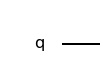

In [10]:
# Problem 2: Implement Mach-Zehnder interferometer in quantum circuit, `mz` with parameter `phi`

mz_para = QuantumCircuit(1)

# Insert your code here
#
#
#
#
#

# Visualize the quantum circuit
mz_para.draw()

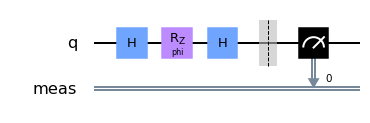

In [11]:
# Solution
mz_para = QuantumCircuit(1)
mz_para.h(0)
mz_para.rz(phi, 0)
mz_para.h(0)
mz_para.measure_all()
mz_para.draw()

### Create a parameter list

In [21]:
# Parameter list
phi_list = [] # in unit of pi
parameter_list = [{phi:pi*phi} for phi in phi_list]

In [30]:
# Solution
n_max = 50
phase_list = np.linspace(0,4,n_max)
parameter_list = [{phi:pi*phase} for phase in phase_list]

In [16]:
# Load IBM Quantum Experience account
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
provider

/Users/junye/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [17]:
# Find the least busy operational real device
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.status().operational==True 
                                       and not x.configuration().simulator ))
backend

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

In [32]:
# Use a handy job watcher to monitor job status
import qiskit.tools.jupyter
%qiskit_job_watcher

shots=1024
job_exp = execute(mz_para, parameter_binds=parameter_list, backend=backend, shots=shots)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [36]:
# The job may take a few minutes to run. 
# You can note down the `JOB_ID` (shown in the job watcher or on IQX) and retrieve the job later.
# job_exp = backend.retrieve_job('JOD_ID')
job_exp = backend.retrieve_job('5f7eca7620d29900199a41db')

In [34]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pylab as pylab
# parameters for waiting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

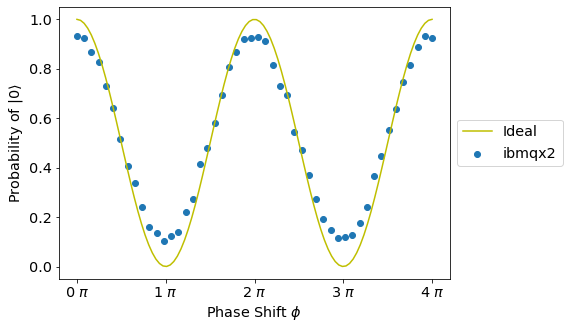

In [37]:
# Create a figure
fig, ax = plt.subplots(figsize=(7, 5))

# Plot experimental results
x = phase_list
visibility = {}
y = [d['0']/shots for d in job_exp.result().get_counts()]
ax.scatter(x,y, label=f"{job_exp.backend().name()}")

# Plot ideal results
ideal_x = np.linspace(0,4,100)
ideal_y = 1/2 * (1 + np.cos(ideal_x * pi))
ax.plot(ideal_x, ideal_y, 'y', label='Ideal')

# Add legend and axes labels
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel(r'Probability of $|0\rangle$')
ax.set_xlabel('Phase Shift $\phi$')

# Add pi in x ticks 
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1.0))

In [25]:
vis = (max(y)-min(y))/(max(y)+min(y))
visibility[job_exp.backend().name()] = vis
ax.scatter(x,y, label=f"{job_exp.backend().name()}, Vis: {vis:.3f}")